<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/ML_lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME OF THE STUDENT : SRIHARSHITHA DEEPALA**

**REGISTRATION NUMBER : 19BCD7246**

**COURSE CODE : CSE3008**

**LAB NUMBER : 11**

# **Implement Naive Bayes  algorithm for text data classification**

**SPAM DETECTION - A Naive Bayes classifier to classify whether an SMS text is spam or not spam.**

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("/content/sample_data/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [51]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [53]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of spam or ham messages')

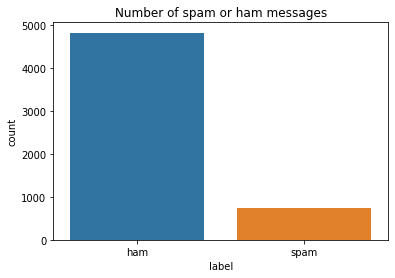

In [55]:
sns.countplot(df.label)
plt.xlabel("label")
plt.title("Number of spam or ham messages")

In [56]:
df["label_as_num"] = df.label.map({"ham":0, "spam":1})

In [57]:
df.head()

,label,text,label_as_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
y = df['label']
x = df['text']
cv = CountVectorizer()
x = cv.fit_transform(x)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)


In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179, 8672)
(1393, 8672)
(4179,)
(1393,)


In [70]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
clf.score(X_test,y_test)

0.9791816223977028

In [72]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1213
        spam       0.91      0.93      0.92       180

    accuracy                           0.98      1393
   macro avg       0.95      0.96      0.95      1393
weighted avg       0.98      0.98      0.98      1393



Text(91.68, 0.5, 'predicted label')

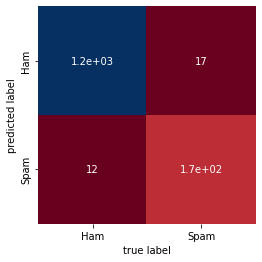

In [75]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Ham', 'Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [68]:
#Try the model
documents = ['Hello, how are you!',
                'Free entry in 2 a wkly comp',
                'Call me now.',
                'Hello, shall we meet tomorrow?']

clf.predict(cv.transform(documents))

array(['ham', 'spam', 'ham', 'ham'], dtype='<U4')